## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (1,2),
    (2,3)
])

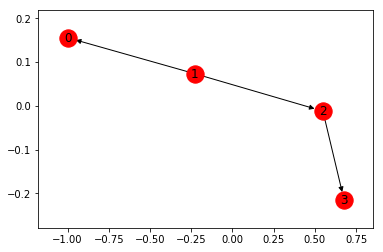

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[-0.38973422,  0.77946844, -0.48173799,  0.09200377],
        [ 0.17298965, -0.3459793 , -0.55980626,  0.73279591]])

In [8]:
sigma

array([[ 0.23630384, -0.03370999],
       [-0.03370999,  0.58187798]])

In [9]:
print(eqL)

[[ 3.33333333e-01 -6.66666667e-01  3.33333333e-01 -1.01272189e-16]
 [-6.66666667e-01  1.33333333e+00 -6.66666667e-01  1.97756795e-16]
 [ 3.33333333e-01 -6.66666667e-01  8.33333333e-01 -5.00000000e-01]
 [-1.30716674e-16  1.47344963e-16 -5.00000000e-01  5.00000000e-01]]


In [10]:
posG, negG = separate_graphs(eqL)

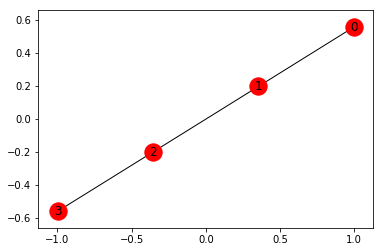

In [12]:
nx.draw_networkx(posG)

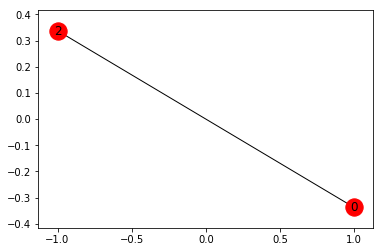

In [13]:
nx.draw_networkx(negG)